In [1]:
### plot water current speed vs. adcp's speed at the top bin
import numpy as np
import netCDF4 as nc
import matplotlib
import matplotlib.pyplot as plt
import datetime
import os
# Why comparing this? Suspecting water current speed in the portal is not the top bin of ADCP current as we discussed. 
# For example, 2024's SD-1083 at 10/6 ~08:24Z the water current speed is ~1.944 kt (1 m/s) while the 6 m u and v are 0.58 m/s and 0.21 m/s (total current speed is 0.62 m/s).

In [13]:
year = '2022'
platf_num = '1031'
path_wcspd = os.getcwd()+'/data_merge_airsea/'
path_adcp = os.getcwd()+'/data_merge_adcp/'
### load water current speed data
ds_wcspd = nc.Dataset(path_wcspd+'/airsea-1min-merge-'+year+'-SD'+platf_num+'.nc')
# print(ds_wcspd)
time = ds_wcspd.variables['time'][:]
print(ds_wcspd.variables['time'].units)
dtime_wcspd = np.array([datetime.datetime(int(year),1,1)+datetime.timedelta(seconds=time[i]) for i in range(len(time))])
wcspd = ds_wcspd.variables['WATER_CURRENT_SPEED_MEAN'][:]
### load adcp data
ds_adcp = nc.Dataset(path_adcp+'adcp-5min-merge-'+year+'-SD'+platf_num+'.nc')
time = ds_adcp.variables['time'][:]
print(ds_adcp.variables['time'].units)
dtime_adcp = np.array([datetime.datetime(int(year),1,1)+datetime.timedelta(seconds=time[i]) for i in range(len(time))])
u = ds_adcp.variables['vel_east'][:]
v = ds_adcp.variables['vel_north'][:]
depth = ds_adcp.variables['depth'][:]
print(depth.shape, dtime_adcp.shape, u.shape)

seconds since 2022-01-01
seconds since 2022-01-01
(50,) (16087,) (16087, 50)


<Figure size 432x288 with 0 Axes>

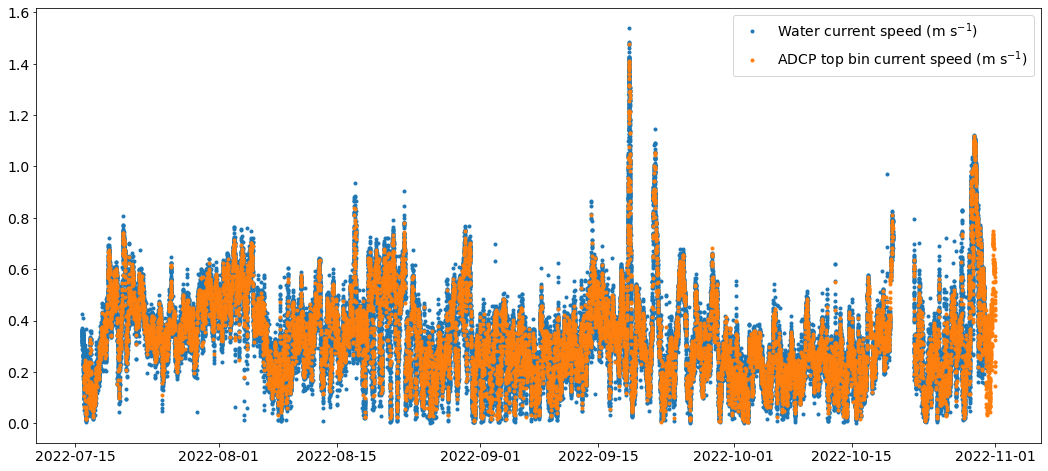

In [16]:
### plot time series
iz = np.argmin(depth)
nrow = 1
plt.clf()
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(nrow,1, figsize=(18, 8))
### water current speed
plt.plot( dtime_wcspd, wcspd,'.', label='Water current speed (m s$^{-1}$)' )
### adcp top velocity
adcp_vel = np.sqrt( np.square(u[:,iz])+np.square(v[:,iz]) )
plt.plot( dtime_adcp, adcp_vel,'.', label='ADCP top bin current speed (m s$^{-1}$)')
plt.legend()